### **Mengumpulkan Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/sertifikasi/Bank_Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


### **Menelaah Data**

In [ ]:
# Analisis Tipe Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
# Analisis Karakteristik Data
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,39.078223,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,13.453129,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,650.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


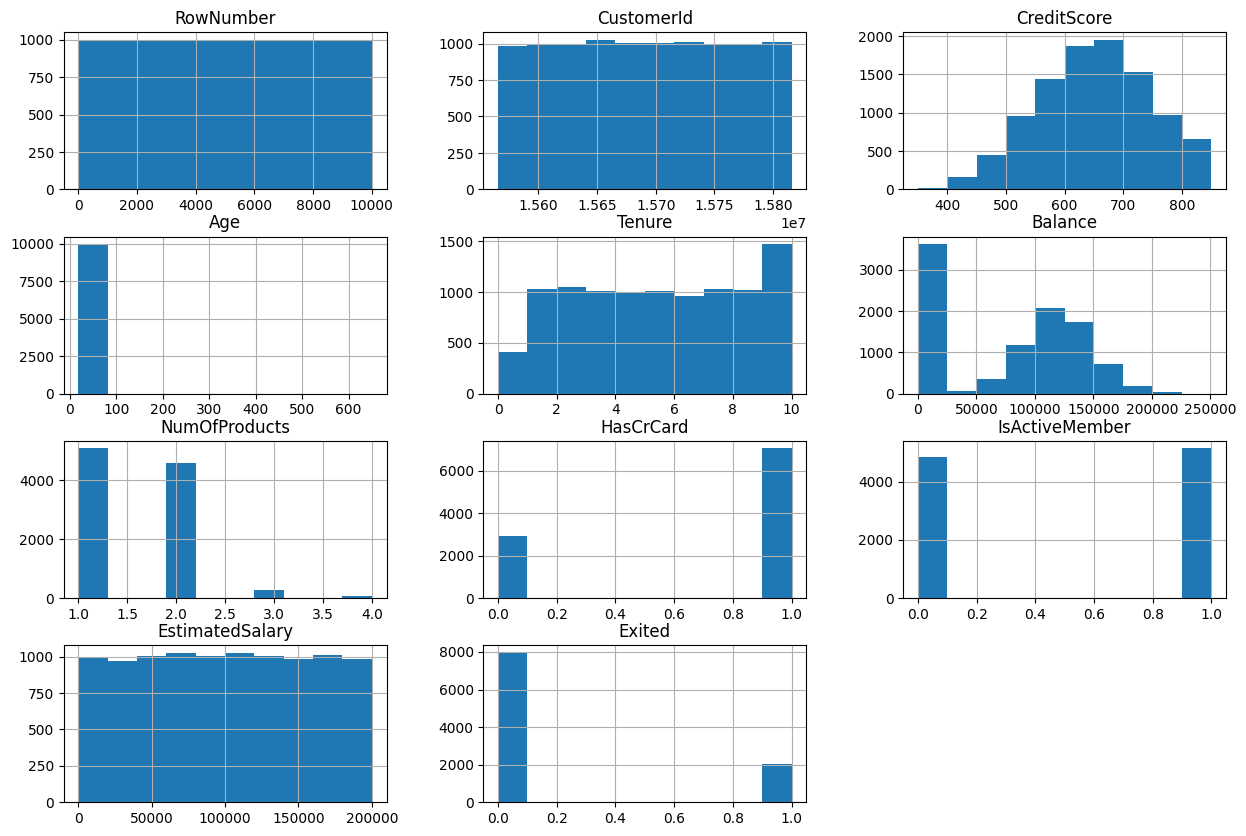

In [ ]:
# Distribusi Data
data.hist(bins=10,figsize=(15,10))
plt.show()

In [ ]:
data.corr()

<ipython-input-7-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,-0.013964,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.004213,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,0.000053,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.013964,0.004213,0.000053,1.000000,0.001399,0.014945,-0.031233,-0.001317,0.078115,-0.010247,0.222597
Tenure,-0.006495,-0.014883,0.000842,0.001399,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.014945,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.031233,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.001317,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.078115,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.010247,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<ipython-input-8-9d378915f8d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


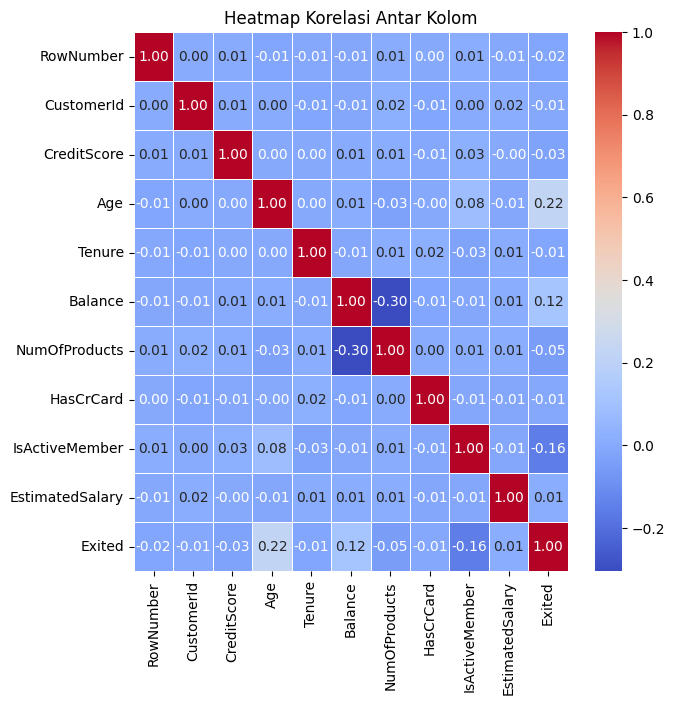

In [ ]:
correlation_matrix = data.corr()

# Membuat heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

### **Memvalidasi Data**

In [ ]:
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             3
Age                3
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 4
Age                   74
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### **Menentukan Objek Data**

In [ ]:
jumlah_row, jumlah_column = data.shape
print(f'Jumlah Baris: {jumlah_row}')
print(f'Jumlah Kolom: {jumlah_column}')

Jumlah Baris: 10000
Jumlah Kolom: 14


### **Membersihkan Data**

In [ ]:
# Memeriksa Konsisten Data
print(data['CustomerId'].unique())
print(data['Surname'].unique())
print(data['CreditScore'].unique())
print(data['Geography'].unique())
print(data['Gender'].unique())
print(data['Age'].unique())
print(data['Tenure'].unique())
print(data['Balance'].unique())
print(data['NumOfProducts'].unique())
print(data['HasCrCard'].unique())
print(data['IsActiveMember'].unique())
print(data['EstimatedSalary'].unique())
print(data['Exited'].unique())

[15634602 15647311 15619304 ... 15584532 15682355 15628319]
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644

In [ ]:
data['Gender'] = data['Gender'].str.replace('Female', 'F')

In [ ]:
data['Gender'].unique()

array(['F', 'Male', 'M', nan], dtype=object)

In [ ]:
data['Gender'] = data['Gender'].str.replace('Male', 'M')

In [ ]:
data['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
# Mencari baris mana yang memiliki nilai NaN pada kolom 'Gender'
rows_with_nan = data[data['Gender'].isnull()]

print("Baris dengan nilai NaN pada kolom 'Gender':")
print(rows_with_nan)

Baris dengan nilai NaN pada kolom 'Gender':
     RowNumber  CustomerId    Surname  CreditScore Geography Gender   Age  \
576        577    15761986     Obialo          439     Spain    NaN  32.0   
726        727    15673570      Olsen          580    France    NaN  37.0   
914        915    15710404  Chinwendu          569    France    NaN  35.0   

     Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
576       3  138901.61              1          1               0   
726       9       0.00              2          0               1   
914      10  124525.52              1          1               1   

     EstimatedSalary  Exited  
576         75685.97       0  
726         77108.66       0  
914        193793.78       0  


In [ ]:
# Menghitung nilai mode dari kolom 'Gender' tanpa memperhitungkan nilai NaN
gender_mode = data['Gender'].dropna().mode()[0]

# Mengisi nilai NaN dengan nilai mode
data['Gender'].fillna(gender_mode, inplace=True)

In [ ]:
# Mengindentifikasi Nilai NaN pada kolom "Gender"
data[data['RowNumber'] == 577]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
576,577,15761986,Obialo,439,Spain,M,32.0,3,138901.61,1,1,0,75685.97,0


In [ ]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
# Mencari baris mana yang memiliki nilai NaN pada kolom 'Age'
rows_with_nan = data[data['Age'].isnull()]

print("Baris dengan nilai NaN pada kolom 'Age':")
print(rows_with_nan)

Baris dengan nilai NaN pada kolom 'Age':
      RowNumber  CustomerId   Surname  CreditScore Geography Gender  Age  \
1698       1699    15807595    Ijendu          485   Germany      M  NaN   
1830       1831    15572467  Chandler          506    France      M  NaN   
1955       1956    15779176      Dike          565   Germany      F  NaN   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1698       7  144244.59              2          1               0   
1830       5       0.00              2          1               1   
1955       3  108888.24              3          0               1   

      EstimatedSalary  Exited  
1698         51113.14       0  
1830        127543.81       0  
1955        135875.51       1  


In [ ]:
# Menghitung nilai rata-rata dari kolom 'Age' tanpa memperhitungkan nilai NaN
age_mean = data['Age'].dropna().mode()[0]

# Mengisi nilai NaN dengan nilai rata-rata ('age_mean')
data['Age'].fillna(age_mean, inplace=True)

In [ ]:
# Mengindentifikasi Nilai NaN pada kolom "Age"
data[data['RowNumber'] == 1831]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1830,1831,15572467,Chandler,506,France,M,37.0,5,0.0,2,1,1,127543.81,0


In [ ]:
data['Age'].unique()

array([ 42.,  41.,  39.,  43.,  44.,  50.,  29.,  27.,  31.,  24.,  34.,
        25.,  35.,  45.,  58.,  32.,  38.,  46.,  36.,  33.,  40.,  51.,
        61.,  49.,  37.,  19.,  66.,  56.,  26.,  21.,  55.,  75.,  22.,
        30.,  28.,  65.,  48.,  52.,  57.,  73.,  47.,  54.,  72.,  20.,
        67.,  79.,  62.,  53.,  80.,  59.,  68.,  23.,  60.,  70.,  63.,
        64.,  18.,  82.,  69.,  74.,  71., 340.,  76., 380., 650., 400.,
        77.,  88.,  85.,  84.,  78.,  81.,  92.,  83.])

In [ ]:
# Mengidentifikasi Missing Value
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
# Data Numerik
numeric_data = data.select_dtypes(include=np.number)
numeric_data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42.0,3,75075.31,2,1,0,92888.52,1


Menentukan nilai Z-Score pada tiap barisnya untuk melihat seberapa jauh nilai data dari mean dalam satuan standar deviasi.

In [ ]:
# Score Z-Score
z = np.abs(stats.zscore(numeric_data))
print(z)

      RowNumber  CustomerId  CreditScore       Age    Tenure   Balance  \
0      1.731878    0.783213     0.326221  0.217271  1.041760  1.225848   
1      1.731531    0.606534     0.440036  0.142924  1.387538  0.117350   
2      1.731185    0.995885     1.536794  0.217271  1.032908  1.333053   
3      1.730838    0.144767     0.501521  0.005769  1.387538  1.225848   
4      1.730492    0.652659     2.063884  0.291618  1.041760  0.785728   
...         ...         ...          ...       ...       ...       ...   
9995   1.730492    1.177652     1.246488  0.005769  0.004426  1.225848   
9996   1.730838    1.682806     1.391939  0.303156  1.724464  0.306379   
9997   1.731185    1.479282     0.604988  0.228810  0.687130  1.225848   
9998   1.731531    0.119356     1.256835  0.217271  0.695982  0.022608   
9999   1.731878    0.870559     1.463771  0.823584  0.350204  0.859965   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  
0          0.911583   0.646092     

In [ ]:
# Nilai yang termasuk Outliers
threshold = 3
print(np.where(z > 3))

(array([   7,   70,  310,  766, 1180, 1254, 1312, 1405, 1439, 1469, 1488,
       1568, 1631, 1701, 1838, 1876, 1962, 2124, 2196, 2285, 2458, 2462,
       2473, 2499, 2509, 2541, 2614, 2617, 2872, 3033, 3152, 3365, 3387,
       3531, 3841, 3994, 4013, 4014, 4166, 4260, 4403, 4511, 4516, 4606,
       4654, 4748, 4822, 4931, 5010, 5137, 5235, 5386, 5700, 5904, 6150,
       6172, 6279, 6443, 6750, 6759, 6875, 7257, 7457, 7526, 7567, 7698,
       7724, 7729, 7956, 8041, 8590, 8683, 8723, 8762, 8850, 8923, 9080,
       9215, 9255, 9309, 9323, 9370, 9411, 9490, 9540, 9565, 9624]), array([6, 6, 3, 3, 3, 6, 3, 2, 3, 6, 6, 3, 2, 6, 2, 6, 2, 6, 6, 6, 3, 6,
       2, 6, 6, 6, 6, 6, 6, 3, 6, 6, 3, 3, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 3, 6, 6, 6, 3, 6, 6,
       6, 6, 3, 6, 6, 6, 2, 2, 6, 6, 3, 6, 6, 3, 6, 6, 6, 3, 6, 6, 2]))


Data outliers diatas merupakan data yang nilainya diluar dari rentang 3.

In [ ]:
# Data Sesudah Outliers Dihapus
data_clean = data[(z < 3).all(axis=1)]
data_clean

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,F,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,F,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,F,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,F,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,F,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,M,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,M,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,F,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,M,42.0,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Feature Engineering
target_correlation = data_clean.corr()['Exited'].sort_values(ascending=False)
target_correlation

<ipython-input-31-2922f799c580>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_correlation = data_clean.corr()['Exited'].sort_values(ascending=False)


Exited             1.000000
Age                0.287108
Balance            0.116239
EstimatedSalary    0.009707
CustomerId        -0.003712
HasCrCard         -0.006545
Tenure            -0.015174
RowNumber         -0.017097
CreditScore       -0.021884
NumOfProducts     -0.105080
IsActiveMember    -0.156979
Name: Exited, dtype: float64

In [ ]:
# Pemisahan kolom yang tidak mendekati correlation target
threshold = 0.01
columns = target_correlation[abs(target_correlation)<=threshold].index
df_clean = data_clean.drop(columns=columns)
df_clean

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited
0,1,Hargrave,619,France,F,42.0,2,0.00,1,1,1
1,2,Hill,608,Spain,F,41.0,1,83807.86,1,1,0
2,3,Onio,502,France,F,42.0,8,159660.80,3,0,1
3,4,Boni,699,France,F,39.0,1,0.00,2,0,0
4,5,Mitchell,850,Spain,F,43.0,2,125510.82,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Obijiaku,771,France,M,39.0,5,0.00,2,0,0
9996,9997,Johnstone,516,France,M,35.0,10,57369.61,1,1,0
9997,9998,Liu,709,France,F,36.0,7,0.00,1,1,1
9998,9999,Sabbatini,772,Germany,M,42.0,3,75075.31,2,0,1


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9913 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RowNumber       9913 non-null   int64  
 1   Surname         9913 non-null   object 
 2   CreditScore     9913 non-null   int64  
 3   Geography       9913 non-null   object 
 4   Gender          9913 non-null   object 
 5   Age             9913 non-null   float64
 6   Tenure          9913 non-null   int64  
 7   Balance         9913 non-null   float64
 8   NumOfProducts   9913 non-null   int64  
 9   IsActiveMember  9913 non-null   int64  
 10  Exited          9913 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 929.3+ KB


In [ ]:
df_clean

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited
0,1,Hargrave,619,France,F,42.0,2,0.00,1,1,1
1,2,Hill,608,Spain,F,41.0,1,83807.86,1,1,0
2,3,Onio,502,France,F,42.0,8,159660.80,3,0,1
3,4,Boni,699,France,F,39.0,1,0.00,2,0,0
4,5,Mitchell,850,Spain,F,43.0,2,125510.82,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Obijiaku,771,France,M,39.0,5,0.00,2,0,0
9996,9997,Johnstone,516,France,M,35.0,10,57369.61,1,1,0
9997,9998,Liu,709,France,F,36.0,7,0.00,1,1,1
9998,9999,Sabbatini,772,Germany,M,42.0,3,75075.31,2,0,1


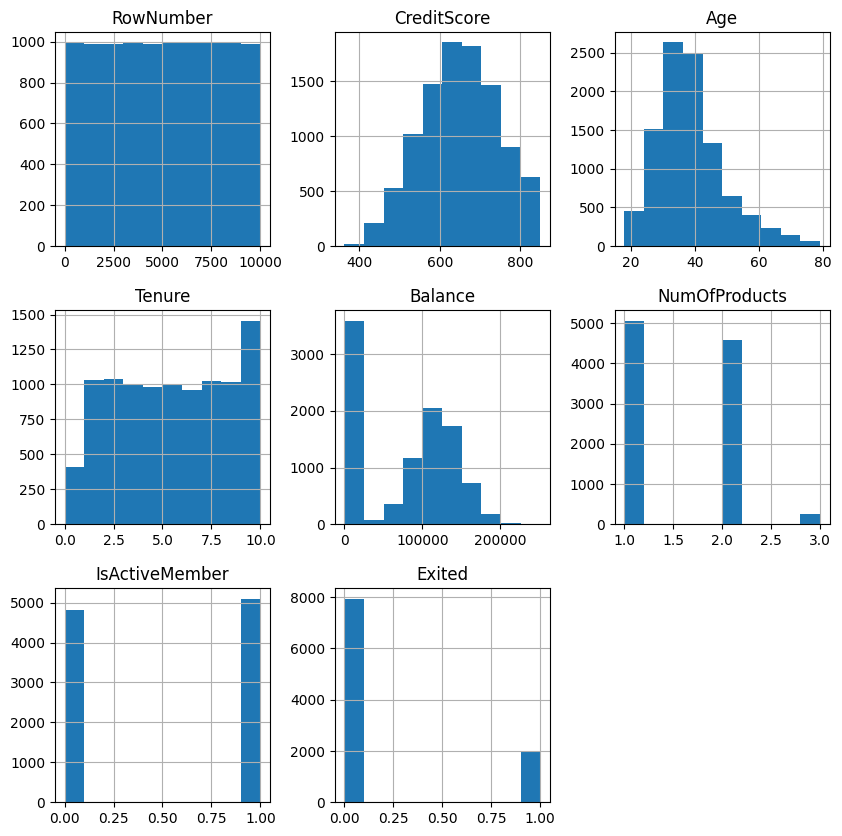

In [ ]:
df_clean.hist(bins=10,figsize=(10,10))
plt.show()

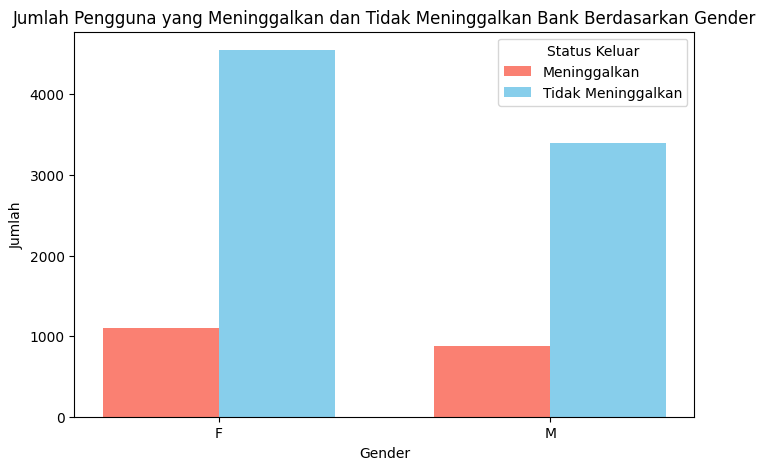

In [ ]:
# Membuat histogram untuk melihat kategori gender yang meninggalkan bank
plt.figure(figsize=(8, 5))

# Menghitung jumlah pengguna yang meninggalkan dan tidak meninggalkan berdasarkan jenis kelamin
exit_counts = df_clean[df_clean['Exited'] == 1]['Gender'].value_counts()
not_exit_counts = df_clean[df_clean['Exited'] == 0]['Gender'].value_counts()

# Menentukan posisi bar untuk setiap jenis kelamin
bar_width = 0.35
bar_positions_exit = range(len(exit_counts))
bar_positions_not_exit = [pos + bar_width for pos in bar_positions_exit]

# Menampilkan bar chart
plt.bar(bar_positions_exit, exit_counts, width=bar_width, color='salmon', label='Meninggalkan')
plt.bar(bar_positions_not_exit, not_exit_counts, width=bar_width, color='skyblue', label='Tidak Meninggalkan')

# Menambahkan label dan judul
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.title('Jumlah Pengguna yang Meninggalkan dan Tidak Meninggalkan Bank Berdasarkan Gender')
plt.xticks([pos + bar_width / 2 for pos in bar_positions_exit], exit_counts.index)
plt.legend(title='Status Keluar')

# Menampilkan grafik
plt.show()

### **Mengkonstruksi Data**

In [ ]:
# Drop kolom yang tidak diperlukan saat pemodelan
kolom = ['RowNumber', 'Surname', 'Geography']
df_clean = df_clean.drop(kolom, axis=1)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9913 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     9913 non-null   int64  
 1   Gender          9913 non-null   object 
 2   Age             9913 non-null   float64
 3   Tenure          9913 non-null   int64  
 4   Balance         9913 non-null   float64
 5   NumOfProducts   9913 non-null   int64  
 6   IsActiveMember  9913 non-null   int64  
 7   Exited          9913 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 697.0+ KB


In [ ]:
# Mengubah tipe data 'Age' dari float menjadi int
df_clean['Age'] = df_clean['Age'].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9913 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     9913 non-null   int64  
 1   Gender          9913 non-null   object 
 2   Age             9913 non-null   int64  
 3   Tenure          9913 non-null   int64  
 4   Balance         9913 non-null   float64
 5   NumOfProducts   9913 non-null   int64  
 6   IsActiveMember  9913 non-null   int64  
 7   Exited          9913 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 697.0+ KB


### **Menentukan Label Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Mengubah variabel kategorikal 'Gender' menjadi numerik dalam bentuk label
label_encoder = LabelEncoder()
df_clean['Gender'] = label_encoder.fit_transform(df_clean['Gender'])

In [ ]:
df_clean

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited
0,619,0,42,2,0.00,1,1,1
1,608,0,41,1,83807.86,1,1,0
2,502,0,42,8,159660.80,3,0,1
3,699,0,39,1,0.00,2,0,0
4,850,0,43,2,125510.82,1,1,0
...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,0,0
9996,516,1,35,10,57369.61,1,1,0
9997,709,0,36,7,0.00,1,1,1
9998,772,1,42,3,75075.31,2,0,1


In [ ]:
# Memisahkan target dari dataframe
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited']

In [ ]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember
0,619,0,42,2,0.00,1,1
1,608,0,41,1,83807.86,1,1
2,502,0,42,8,159660.80,3,0
3,699,0,39,1,0.00,2,0
4,850,0,43,2,125510.82,1,1
...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,0
9996,516,1,35,10,57369.61,1,1
9997,709,0,36,7,0.00,1,1
9998,772,1,42,3,75075.31,2,0


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9913, dtype: int64

### **Membangun Model**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Transformasi tabel
data_scaler = MinMaxScaler()
X_scaled = data_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Pemisahan data training dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [ ]:
actual = y_test  # Actual target values
# Membuat confusion matrix dari semua model yang sudah dilakukan
knn_cm = confusion_matrix(actual, knn_pred)
dt_cm = confusion_matrix(actual, dt_pred)
rf_cm = confusion_matrix(actual, rf_pred)
xgb_cm = confusion_matrix(actual, xgb_pred)

# Mengubah confusion matrix ke dataframe
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Mengubah confusion matrix ke dataframe dengan label
knn_cm_df = confusion_matrix_to_dataframe(knn_cm)
dt_cm_df = confusion_matrix_to_dataframe(dt_cm)
rf_cm_df = confusion_matrix_to_dataframe(rf_cm)
xgb_cm_df = confusion_matrix_to_dataframe(xgb_cm)

In [ ]:
knn_cm_df

Predicted,0,1
Actual,,
0,1857,104
1,305,213


In [ ]:
dt_cm_df

Predicted,0,1
Actual,,
0,1681,280
1,281,237


In [ ]:
rf_cm_df

Predicted,0,1
Actual,,
0,1881,80
1,313,205


In [ ]:
xgb_cm_df

Predicted,0,1
Actual,,
0,1857,104
1,313,205


### **Mengevaluasi Hasil Pemodelan**

In [ ]:
# Evaluasi hasil pemodelan menggunakan matriks yang terdapat di klasifikasi
def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, accuracy, precision, recall, f1

# Evaluate KNN
knn_cm, knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate(y_test, knn_pred)

# Evaluate Decision Tree
dt_cm, dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate(y_test, dt_pred)

# Evaluate Random Forest
rf_cm, rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate(y_test, rf_pred)

# Evaluate XGBoost
xgb_cm, xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate(y_test, xgb_pred)

In [ ]:
results_df = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [knn_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [knn_precision, dt_precision, rf_precision, xgb_precision],
    'F1 Score': [knn_f1, dt_f1, rf_f1, xgb_f1],
    'Recall': [knn_recall, dt_recall, rf_recall, xgb_recall]
})
results_dict = results_df.to_dict()
new_df = pd.DataFrame.from_dict(results_dict)
print(new_df)

           Model  Accuracy  Precision  F1 Score    Recall
0            KNN  0.835014   0.819852  0.819178  0.835014
1  Decision Tree  0.773699   0.773538  0.773619  0.773699
2  Random Forest  0.841468   0.828494  0.822913  0.841468
3        XGBoost  0.831787   0.815572  0.814787  0.831787


### **Interpretasi Fitur yang Paling Berpengaruh**

In [ ]:
rf_feature_importance = rf.feature_importances_
feature_names = X.columns

rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importance})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df

,Feature,Importance
2,Age,0.285801
0,CreditScore,0.226759
4,Balance,0.198520
5,NumOfProducts,0.113910
3,Tenure,0.111163
6,IsActiveMember,0.045056
1,Gender,0.018791


Variabel yang paling berpengaruh pada dataset Bank Churn Modelling yaitu variabel Age dengan tingkat importance yaitu sebesar 0.285801.

### **Membuat Dataset Baru**

In [ ]:
random_values = np.random.randint(2, size=9913)
random_float_values = np.random.rand(9913)
random_values_1 = np.random.randint(1, 11, size=9913)
random_values_2 = np.random.randint(1, 4, size=9913)
random_values_3 = np.random.randint(18, 80, size=9913)
random_values_4 = np.random.randint(18, 80, size=9913)

In [ ]:
new_data = pd.DataFrame({
    'CreditScore':random_values_4,
    'Gender':random_values,
    'Age':random_values_3,
    'Tenure':random_values_1,
    'Balance':random_float_values,
    'NumOfProducts':random_values_2,
    'IsActiveMember':random_values,
    'Exited':random_values
})

In [ ]:
new_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited
0,56,0,29,5,0.140239,1,0,0
1,66,0,29,3,0.104170,3,0,0
2,70,0,68,8,0.336461,1,0,0
3,43,1,45,8,0.552939,2,1,1
4,73,1,62,6,0.368240,1,1,1
...,...,...,...,...,...,...,...,...
9908,38,1,31,9,0.538342,1,1,1
9909,20,1,42,2,0.424806,3,1,1
9910,28,0,26,9,0.756166,3,0,0
9911,52,0,52,7,0.344638,1,0,0


### **Interpretasi Model ke dalam Data Test**

In [ ]:
# membuat prediksi dari data test
knn_predictions = knn.predict(X_test)
dt_predictions = dt.predict(X_test)
rf_predictions = rf.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# membuat dataframe untuk prediksi
df_knn_predictions = pd.DataFrame({'KNN_Predictions': knn_predictions})
df_dt_predictions = pd.DataFrame({'DT_Predictions': dt_predictions})
df_rf_predictions = pd.DataFrame({'RF_Predictions': rf_predictions})
df_xgb_predictions = pd.DataFrame({'XGB_Predictions': xgb_predictions})

# menggabungkan prediksi dataframe
df_test_combined = pd.concat([X_test.reset_index(drop=True), df_dt_predictions, df_rf_predictions,], axis=1)
df_test_combined

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,DT_Predictions,RF_Predictions
0,0.271047,0.0,0.327869,0.2,0.251469,0.0,1.0,1,0
1,0.611910,0.0,0.262295,0.0,0.000000,0.5,0.0,0,0
2,0.164271,0.0,0.180328,0.9,0.394693,0.5,0.0,0,0
3,0.685832,1.0,0.213115,0.3,0.433664,0.5,1.0,1,0
4,0.182752,1.0,0.557377,0.1,0.392363,0.5,0.0,1,1
...,...,...,...,...,...,...,...,...,...
2474,0.390144,1.0,0.229508,0.7,0.255411,0.0,1.0,0,0
2475,0.414784,1.0,0.327869,0.0,0.488038,0.0,0.0,1,0
2476,0.550308,0.0,0.065574,0.3,0.000000,0.5,0.0,0,0
2477,0.759754,1.0,0.295082,0.1,0.000000,0.5,1.0,0,0


Dari hasil pemodelan Decision Tree dan Random Forest yang sudah dilakukan, dapat disimpulkan bahwa:
*   Nasabah bank dengan CreditScore 0.271047 berdasarkan model Decision Tree di prediksi meninggalkan/menutup tabungan, akan tetapi berdasarkan model Random Forest nasabah tersebut di prediksi masih mempertahankan tabungannya di bank.
*   Nasabah bank dengan CreditScore 0.164271, berdasarkan model Decision Tree dan Random Forest di prediksi mempertahankan tabungannya di bank.
*   Nasabah bank dengan CreditScore 0.414784 berdasarkan model Decision Tree dan Random Forest di prediksi masih meninggalkan/menutup tabungannya di bank.


